In [1]:
import pandas as pd #데이터 구성
import numpy as np #행렬 연산

import matplotlib as mpl
import matplotlib.pyplot as plt #데이터 시각화
import matplotlib.font_manager as fm

mpl.rc('font', family = "AppleGothic")
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz

from statsmodels.formula.api import ols #회귀분석
from statsmodels.api import qqplot, add_constant #qqplot, 회귀분석 상수항 추가
import statsmodels.formula.api as smf #선형 모델 formula
from statsmodels.tools.eval_measures import rmse #평가함수
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공선성 확인
from sklearn.linear_model import LinearRegression #선형회귀모형
from sklearn.feature_selection import RFE #변수선택법(후진제거법)
from sklearn.preprocessing import StandardScaler #Scale 변환 -> 표준화 회귀계수 산출

from sklearn.model_selection import train_test_split #데이터 분할(test, train)
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
#데이터 경로는 본인의 데이터 파일 경로로 지정하셔야 합니다.
df_raw = pd.read_csv("/Users/wonho/Temp/Hustar_ICT심화트랙/dataset.csv",engine="python", encoding = "EUC-KR")
df_raw 

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
5,PB562779,2008-08-01:00:02:06,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1143,127,1128,57,314,1128,874,적용,8,4조
6,PB562780,2008-08-01:00:02:28,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1138,126,1130,50,289,1130,878,적용,8,2조
7,PB562781,2008-08-01:00:02:21,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1139,126,1131,52,294,1131,870,적용,8,4조
8,PB562782,2008-08-01:00:02:51,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,...,1127,126,1122,52,293,1122,873,적용,8,1조
9,PB562783,2008-08-01:00:03:15,양품,COMMON,T8,38.43,3129,16187,15280,2호기,...,1135,119,1124,73,298,1124,881,적용,8,4조


In [62]:
#결측치 확인
df_raw.isnull().sum(axis=0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [63]:
# 변수 제거
df_raw.drop("PLATE_NO",axis=1,inplace=True)
df_raw.drop("ROLLING_DATE",axis=1,inplace=True)
df_raw.drop("STEEL_KIND",axis=1,inplace=True)
df_raw.drop("FUR_NO_ROW",axis=1,inplace=True)
df_raw.head()

,SCALE,SPEC,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,32.25,3707,15109,14180,1호기,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,AB/EH32-TM,32.25,3707,15109,14180,1호기,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,NV-E36-TM,33.27,3619,19181,18130,2호기,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,NV-E36-TM,33.27,3619,19181,18130,2호기,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,BV-EH36-TM,38.33,3098,13334,12430,3호기,1140,134,1128,48,314,1128,873,적용,8,1조


In [64]:
df_raw["SCALE"] = np.where(df_raw["SCALE"]=="불량",1,0)
df_raw["HSB"] = np.where(df_raw["HSB"]=="적용",1,0)

df_raw = df_raw[df_raw["HSB"] == 1]
df_raw = df_raw[df_raw["ROLLING_TEMP_T5"] > 200]

In [65]:
df_raw.reset_index(drop = True, inplace = True)
df_raw

,SCALE,SPEC,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,32.25,3707,15109,14180,1호기,1144,116,1133,59,282,1133,934,1,8,2조
1,0,AB/EH32-TM,32.25,3707,15109,14180,1호기,1144,122,1135,53,283,1135,937,1,8,2조
2,0,NV-E36-TM,33.27,3619,19181,18130,2호기,1129,116,1121,55,282,1121,889,1,8,3조
3,0,NV-E36-TM,33.27,3619,19181,18130,2호기,1152,125,1127,68,316,1127,885,1,8,3조
4,0,BV-EH36-TM,38.33,3098,13334,12430,3호기,1140,134,1128,48,314,1128,873,1,8,1조
5,0,BV-EH36-TM,38.33,3098,13334,12430,3호기,1143,127,1128,57,314,1128,874,1,8,4조
6,0,BV-EH36-TM,38.33,3099,16719,15590,1호기,1138,126,1130,50,289,1130,878,1,8,2조
7,0,BV-EH36-TM,38.33,3099,16719,15590,1호기,1139,126,1131,52,294,1131,870,1,8,4조
8,0,BV-EH36-TM,38.33,3099,16719,15590,2호기,1127,126,1122,52,293,1122,873,1,8,1조
9,0,COMMON,38.43,3129,16187,15280,2호기,1135,119,1124,73,298,1124,881,1,8,4조


In [66]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,SPEC_PILAC-BT33,SPEC_SA283-C,SPEC_V42JBN3,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,32.25,3707,15109,14180,1144,116,1133,59,282,...,0,0,0,1,0,0,0,1,0,0
1,0,32.25,3707,15109,14180,1144,122,1135,53,283,...,0,0,0,1,0,0,0,1,0,0
2,0,33.27,3619,19181,18130,1129,116,1121,55,282,...,0,0,0,0,1,0,0,0,1,0
3,0,33.27,3619,19181,18130,1152,125,1127,68,316,...,0,0,0,0,1,0,0,0,1,0
4,0,38.33,3098,13334,12430,1140,134,1128,48,314,...,0,0,0,0,0,1,1,0,0,0


In [67]:
df_raw_y = df_raw_dummy["SCALE"] #목표 변수 설정
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False) #설명 변수 데이터 지정

In [68]:
#train_test_split : [train(0.7) : test(0.3)]
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

#train_test_split : [train(0.57) : valiation(0.43)]
df_train_x, df_valiation_x, df_train_y, df_valiation_y = train_test_split(df_train_x, df_train_y, test_size = 0.43, random_state = 1234)

#데이터 분할 [train(0.4) : valiation(0.3) : test(0.3)]
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("valiation data X size : {}".format(df_valiation_x.shape))
print("valiation data Y size : {}".format(df_valiation_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (271, 83)
train data Y size : (271,)
valiation data X size : (205, 83)
valiation data Y size : (205,)
test data X size : (205, 83)
test data Y size : (205,)


In [69]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_valiation_x, df_valiation_y)))

Score on training set: 0.996
Score on test set: 0.946


/Users/wonho/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [70]:
v_feature_name = df_train_x.columns

In [71]:
train_score = []; test_score = []

para_n_tree = [n_tree * 5 for n_tree in range(1, 31)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [72]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,5,0.989,0.917
1,10,0.996,0.922
2,15,1.000,0.951
3,20,1.000,0.937
4,25,1.000,0.941
5,30,1.000,0.941
6,35,1.000,0.941
7,40,1.000,0.941
8,45,1.000,0.951
9,50,1.000,0.946


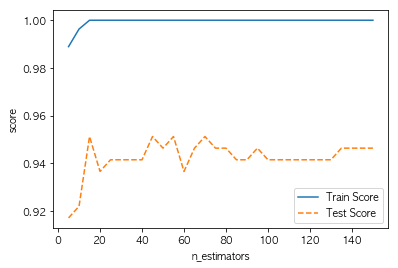

In [73]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [74]:
n_estimators = 70

In [75]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 21)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 70, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [76]:
df_score_depth.round(3)

,depth,TrainScore,TestScore
0,1,0.712,0.668
1,2,0.889,0.839
2,3,0.915,0.883
3,4,0.941,0.898
4,5,0.956,0.927
5,6,0.967,0.937
6,7,0.978,0.941
7,8,0.993,0.941
8,9,1.000,0.956
9,10,1.000,0.946


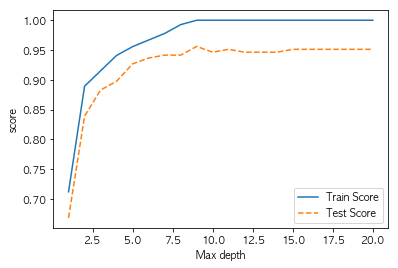

In [77]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("Max depth")
plt.legend()

In [78]:
max_depth = 9

In [81]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(1, 35)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split,
                               n_estimators = 70, max_depth = 9, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_valiation_x, df_valiation_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [82]:
df_score_split.round(3)

,MinSampleSplit,TrainScore,TestScore
0,2,1.000,0.956
1,4,0.993,0.956
2,6,0.982,0.951
3,8,0.974,0.941
4,10,0.963,0.946
5,12,0.963,0.956
6,14,0.963,0.961
7,16,0.963,0.956
8,18,0.967,0.956
9,20,0.963,0.946


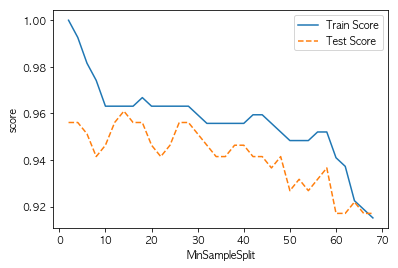

In [83]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSampleSplit")
plt.legend()

In [84]:
min_samples_split = 14

In [85]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                               n_estimators = 70, max_depth = 9, min_samples_split = 14, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_valiation_x, df_valiation_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [86]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.963,0.961
1,2,0.963,0.946
2,3,0.959,0.927
3,4,0.948,0.917
4,5,0.945,0.907
5,6,0.934,0.912
6,7,0.926,0.907
7,8,0.926,0.907
8,9,0.923,0.912
9,10,0.919,0.917


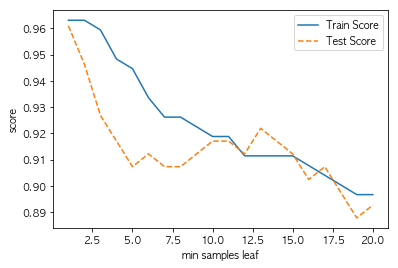

In [87]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [32]:
min_samples_leaf = 13

In [111]:
rf_final = RandomForestClassifier(random_state = 1234, n_estimators = 70,
                                min_samples_leaf = 13, min_samples_split = 30,
                                max_depth = 5)

rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
rf_final

Score on training set: 0.911
Score on test set: 0.878


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [112]:
y_pred = rf_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n {}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.878

Confusion matrix: 
 [[137   0]
 [ 25  43]]


In [113]:
rf_importance = pd.DataFrame()
rf_importance["Feature"] = v_feature_name
rf_importance["Importance"] = rf_final.feature_importances_

rf_importance.sort_values("Importance", ascending = False, inplace = True)
rf_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.223
1,PT_WDTH,0.130
6,FUR_SZ_TEMP,0.095
0,PT_THK,0.092
9,FUR_EXTEMP,0.091
7,FUR_SZ_TIME,0.066
4,FUR_HZ_TEMP,0.053
2,PT_LTH,0.043
3,PT_WGT,0.043
12,ROLLING_DESCALING,0.028


Text(0, 0.5, '설명변수')

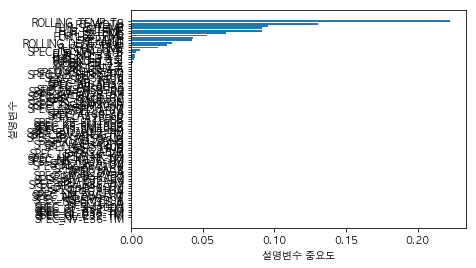

In [119]:
rf_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(rf_importance))
plt.barh(y = coordinates, width = rf_importance["Importance"])
plt.yticks(coordinates, rf_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")